#regression:-Regression is a type of supervised machine learning technique used to:

Predict continuous numerical values based on input features.


✅ Types of Regression
Linear Regression:
Predicts output using a straight line relationship between variables.

Multiple Linear Regression:
Involves multiple input features to predict a single output.

Polynomial Regression:
Uses curved (polynomial) relationships between variables.

Logistic Regression:
Technically a classification algorithm, but named regression; used when the output is binary (e.g., 0/1, True/False).

Ridge, Lasso Regression:
Variants of linear regression that add penalty terms to avoid overfitting.





# ***What is Linear Regression?***
It models the linear relationship between:

Dependent variable (target/output) → e.g., House Price

Independent variable(s) (features/input) → e.g., Size, Bedrooms

It tries to fit a straight line (best fit line) through the data points.

✅ Equation of a Straight Line (Simple Linear Regression):

y=mx+c
Where:

y = predicted value (target)

x = input feature

m = slope (shows how much y changes with x)

c = intercept (value of y when x = 0)

For Multiple Linear Regression:
𝑦
=
𝑚
1
𝑥
1
+
𝑚
2
𝑥
2
+
𝑚
3
𝑥
3
+
.
.
.
+
𝑐
y=m
1
​
 x
1
​
 +m
2
​
 x
2
​
 +m
3
​
 x
3
​
 +...+c

 Performance Metrics
To evaluate the model:

Mean Squared Error (MSE):

𝑀
𝑆
𝐸
=
1/
𝑛
∑
(
𝑦
𝑎
𝑐
𝑡
𝑢
𝑎
𝑙
−
𝑦
𝑝
𝑟
𝑒
𝑑
𝑖
𝑐
𝑡
𝑒
𝑑
)
2

Root Mean Squared Error (RMSE)

R² Score (Coefficient of Determination):
Indicates how well data fits the model.


 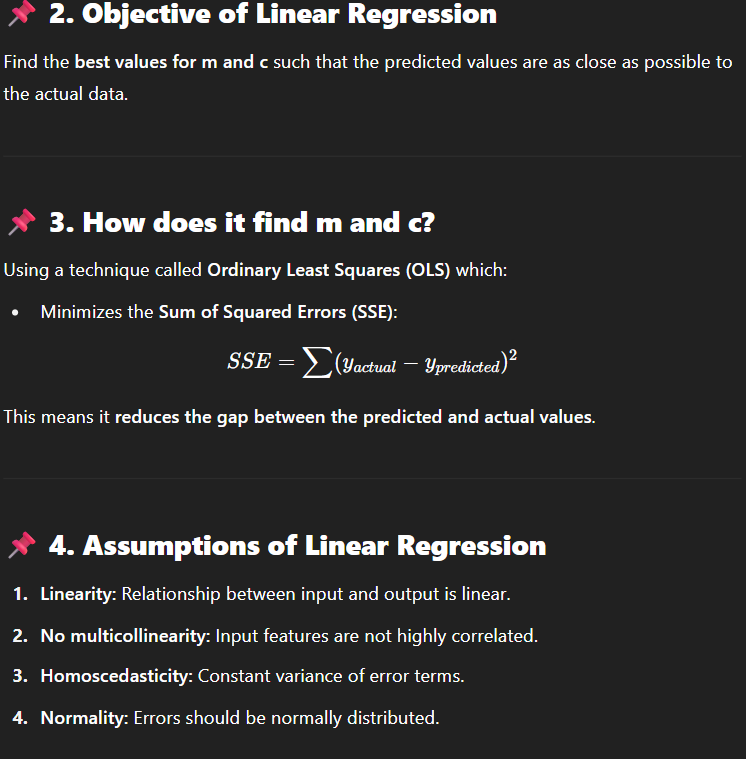

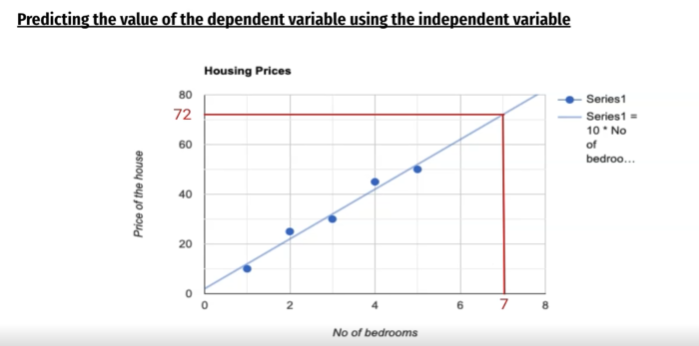

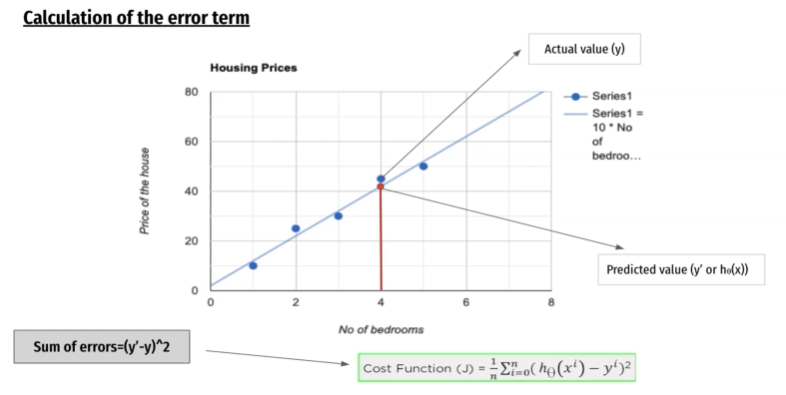

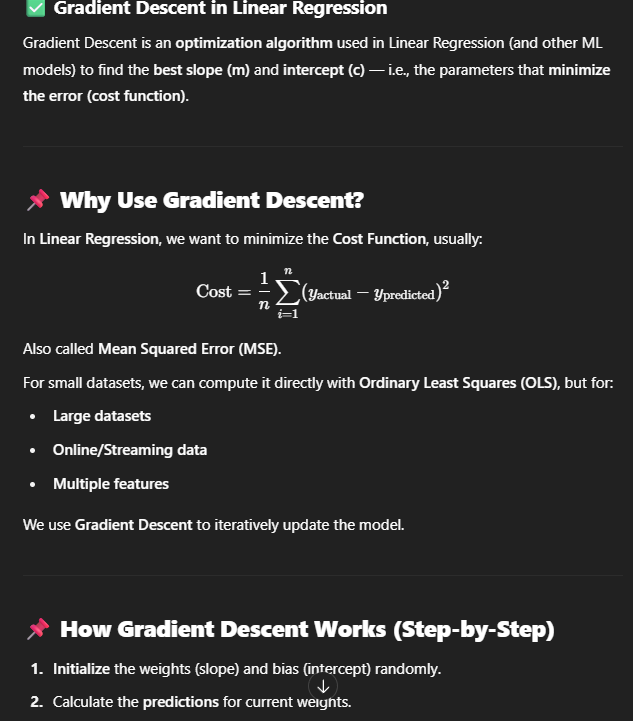

In [ ]:
#implementation of linear regression using sklearn library
#installing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #To split your dataset into two parts:Training set: Used to train the model.Test set: Used to evaluate the model's performance on unseen data.
from sklearn.linear_model import LinearRegression #Imports the LinearRegression class from sklearn.

In [ ]:
#craeting dataframe
df=pd.read_csv('bottle.csv')  #Reads the CSV file named bottle.csv into a Pandas DataFrame named df.
df.head()


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0.0,10.50,33.440,NaN,25.649,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8.0,10.46,33.440,NaN,25.656,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.0,10.46,33.437,NaN,25.654,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19.0,10.45,33.420,NaN,25.643,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20.0,10.45,33.421,NaN,25.643,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#creating binart data frame as linear regression work on that(selecting the 2 columns to aplly LG)
df_binary=df[['Salnty','T_degC']]  #This creates a new DataFrame df_binary containing only the 'Salnty' (Salinity) and 'T_degC' (Temperature in Celsius) columns from the original df.
df_binary.columns=['Sal','Temp']  #This renames the columns
df_binary.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


# 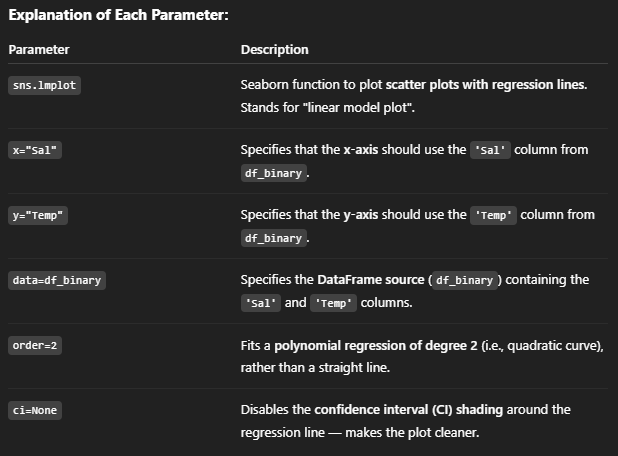

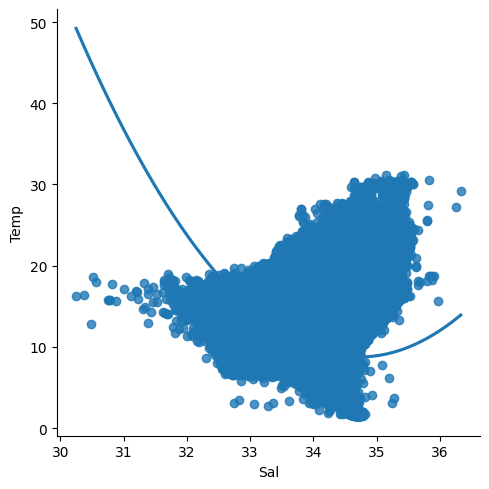

In [ ]:
#visualizing the dataframe
import seaborn as sns # Imports the Seaborn library, a Python data visualization library based on Matplotlib.

#Seaborn makes it easier to create statistical plots, especially those involving relationships between variables.


sns.lmplot(x="Sal",y="Temp",data=df_binary, order=2, ci=None)   #

as line is crossing the clutter it means dataset is not proper we need data preprocessing cleaning etc


In [ ]:
#filling the missing value
df_binary.fillna(method='ffill' ,inplace=True) #Stands for forward fill. It fills missing values with the last known valid value above it in the column.

/tmp/ipython-input-16-2990197051.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method='ffill' ,inplace=True) #Stands for forward fill. It fills missing values with the last known valid value above it in the column.
/tmp/ipython-input-16-2990197051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method='ffill' ,inplace=True) #Stands for forward fill. It fills missing values with the last known valid value above it in the column.


To apply a linear regression model, you need to convert your DataFrame columns (features and target) into NumPy arrays or 2D arrays as required by most models like scikit-learn's LinearRegression.

In [ ]:
#converting df into array
x=np.array(df_binary['Sal']).reshape(-1,1)
y=np.array(df_binary['Temp']).reshape(-1,1)

In [ ]:
#traing testing split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
#fitting the model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predicting the model
y_pred=reg.predict(x_test)
y_pred

array([[10.9354723 ],
       [ 9.46820165],
       [11.93939433],
       ...,
       [ 8.38705485],
       [11.45030411],
       [ 8.86070011]])

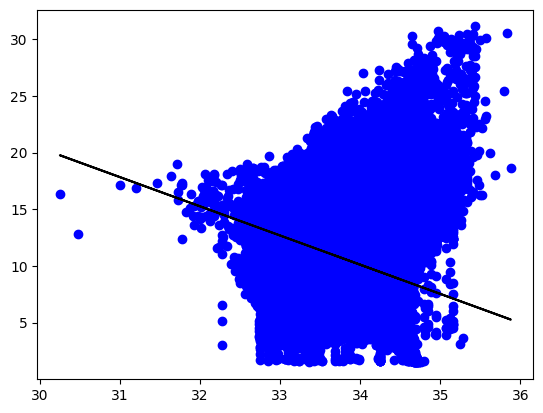

In [ ]:
#checking accuracy by best fitline so visulaize
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='black')
